In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import shutil



In [2]:

import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import tensorflow as tf

In [4]:
base_dir='C:\Data\switch_detection'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

In [5]:
train_normal_dir=os.path.join(train_dir,'normal')
train_adnormal_dir=os.path.join(train_dir,'adnormal')
print(train_normal_dir,train_adnormal_dir)

C:\Data\switch_detection\train\normal C:\Data\switch_detection\train\adnormal


In [6]:
validation_normal_dir=os.path.join(validation_dir,'normal')
validation_adnormal_dir=os.path.join(validation_dir,'adnormal')
print(validation_normal_dir,validation_adnormal_dir)

C:\Data\switch_detection\validation\normal C:\Data\switch_detection\validation\adnormal


In [7]:
test_normal_dir=os.path.join(test_dir,'normal')
test_adnormal_dir=os.path.join(test_dir,'adnormal')
print(test_normal_dir,test_adnormal_dir)

C:\Data\switch_detection\test\normal C:\Data\switch_detection\test\adnormal


In [8]:
train_normal_fnames=os.listdir(train_normal_dir)
train_adnormal_fnames=os.listdir(train_adnormal_dir)
print(train_normal_fnames)
print(train_adnormal_fnames)


['KakaoTalk_20220928_200057543.jpg', 'KakaoTalk_20220928_200057543_01.jpg', 'KakaoTalk_20220928_200057543_08.jpg', 'KakaoTalk_20220928_200057543_09.jpg', 'KakaoTalk_20220928_200057543_10.jpg', 'KakaoTalk_20220928_200057543_11.jpg', 'KakaoTalk_20220928_200057543_12.jpg', 'KakaoTalk_20220928_200057543_13.jpg', 'KakaoTalk_20220928_200057543_14.jpg', 'KakaoTalk_20220928_200057543_15.jpg', 'KakaoTalk_20220928_200057543_16.jpg', 'KakaoTalk_20220928_200057543_17.jpg', 'KakaoTalk_20220928_200057543_18.jpg', 'KakaoTalk_20220928_200057543_19.jpg', 'KakaoTalk_20220928_200057543_20.jpg', 'KakaoTalk_20220928_200057543_21.jpg', 'KakaoTalk_20220928_200057543_22.jpg', 'KakaoTalk_20220928_200057543_23.jpg', 'KakaoTalk_20220928_200057543_24.jpg', 'KakaoTalk_20220928_200057543_25.jpg', 'KakaoTalk_20220928_200057543_26.jpg', 'KakaoTalk_20220928_200057543_27.jpg', 'KakaoTalk_20220928_200057543_28.jpg', 'KakaoTalk_20220928_200057543_29.jpg', 'KakaoTalk_20220928_211458484.jpg', 'KakaoTalk_20220928_211458484_

In [9]:
print('Total training normal images :',len(os.listdir(train_normal_dir)))
print('Total training adnormal images :',len(os.listdir(train_adnormal_dir)))

print('Total validation normal images :',len(os.listdir(validation_normal_dir)))
print('Total validation adnormal images :',len(os.listdir(validation_adnormal_dir)))

print('Total test normal images :',len(os.listdir(test_normal_dir)))
print('Total test adnormal images :',len(os.listdir(test_adnormal_dir)))

Total training normal images : 40
Total training adnormal images : 40
Total validation normal images : 10
Total validation adnormal images : 10
Total test normal images : 5
Total test adnormal images : 5


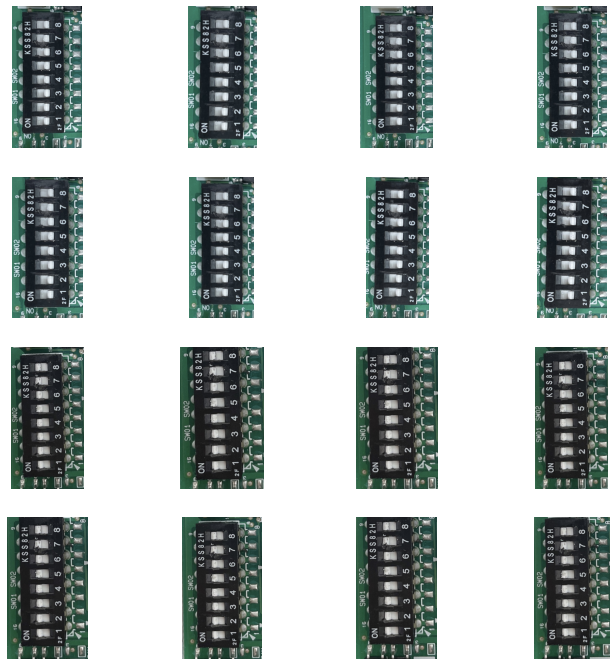

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows,ncols=4,4
pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*3,nrows*3)


pic_index+=8

next_normal_pix=[os.path.join(train_normal_dir,fname) for fname in train_normal_fnames[pic_index-8:pic_index]]
next_adnormal_pix=[os.path.join(train_adnormal_dir,fname) for fname in train_adnormal_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_normal_pix+next_adnormal_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('OFF')
    
    img=mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=2,
                                 #width_shift_range = 0.2,
                                 #height_shift_range = 0.4,
                                 #shear_range = 0.2,
                                 #zoom_range = 0.2,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest'
                                 )



validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(256,256))

validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                            batch_size=4,
                                                            color_mode='grayscale',
                                                            class_mode='binary',
                                                            target_size=(256,256))




test_generator=test_datagen.flow_from_directory(test_dir,
                                                batch_size=4,
                                                color_mode='grayscale',
                                                class_mode='binary',
                                                target_size=(256,256))

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'adnormal': 0, 'normal': 1}

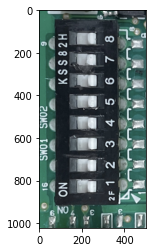

In [14]:
sample_img=mpimg.imread(next_normal_pix[0])
plt.imshow(sample_img)
plt.show()

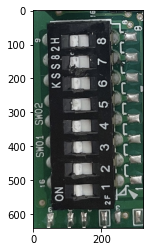

In [15]:
sample_img=mpimg.imread(next_adnormal_pix[0])
plt.imshow(sample_img)
plt.show()

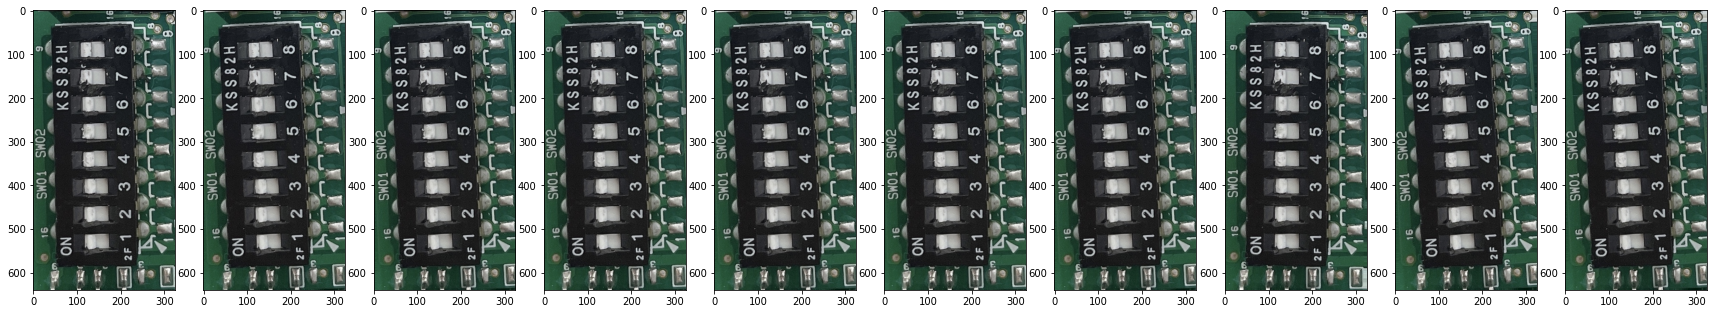

In [16]:
max_iter=10
cnt=1
sample_img2=sample_img[np.newaxis, ...]


plt.figure(figsize=(30,30))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1,max_iter,cnt)
    plt.imshow(image.array_to_img(img[0]))
    
    if cnt == max_iter:
        break
    cnt+=1

In [17]:
import tensorflow as tf
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2), activation='relu',
                        input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 64)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 84, 84, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
import math
import time
import datetime

In [20]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 733181279897075639
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9927917568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 41679778692389527
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [21]:

start=datetime.datetime.now()

history=model.fit(train_generator,
                  validation_data=validation_generator,
                  steps_per_epoch=2,
                  epochs=100,
                  validation_steps=2,
                  verbose=2)

end=datetime.datetime.now()
time=end-start
print("model fit time",time)


Epoch 1/100
2/2 - 3s - loss: 0.7231 - accuracy: 0.5500 - val_loss: 0.6904 - val_accuracy: 0.5000 - 3s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.7201 - accuracy: 0.5750 - val_loss: 0.6912 - val_accuracy: 0.5000 - 282ms/epoch - 141ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6986 - accuracy: 0.4750 - val_loss: 0.6888 - val_accuracy: 0.5000 - 295ms/epoch - 148ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6907 - accuracy: 0.5500 - val_loss: 0.6842 - val_accuracy: 1.0000 - 312ms/epoch - 156ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6799 - accuracy: 0.7250 - val_loss: 0.7219 - val_accuracy: 0.3750 - 317ms/epoch - 158ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6849 - accuracy: 0.6000 - val_loss: 0.6651 - val_accuracy: 1.0000 - 308ms/epoch - 154ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6671 - accuracy: 0.7500 - val_loss: 0.6569 - val_accuracy: 1.0000 - 317ms/epoch - 158ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5929 - accuracy: 0.8250 - val_loss: 0.5040 - val_accuracy: 0.7500 - 333ms/epoch - 166ms/step
Epoch 9/100
2/

In [22]:
score=model.evaluate(train_generator)
print("accuracy=",score[1])
print("loss=",score[0])

4/4 [==============================] - 0s 98ms/step - loss: 1.6290e-04 - accuracy: 1.0000
accuracy= 1.0
loss= 0.00016289834456983954


In [23]:

score2=model.evaluate(validation_generator)
print("accuracy=",score2[1])
print("loss=",score2[0])

5/5 [==============================] - 0s 9ms/step - loss: 3.3148e-04 - accuracy: 1.0000
accuracy= 1.0
loss= 0.00033147932845167816


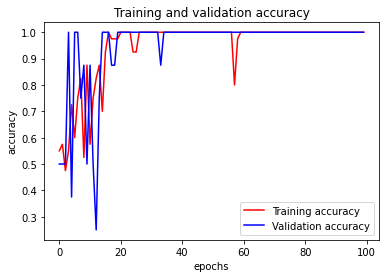

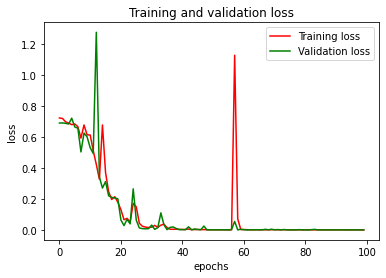

In [24]:

acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [25]:

start = datetime.datetime.now()
score2=model.evaluate(test_generator)
print("accuracy=",score2[1])
print("loss=",score2[0])
end = datetime.datetime.now()
time=end-start
print("test evaluation time",time)

3/3 [==============================] - 0s 62ms/step - loss: 3.2028 - accuracy: 0.5000
accuracy= 0.5
loss= 3.2027575969696045
test evaluation time 0:00:00.201118


In [26]:
import numpy as np
from keras.preprocessing import image

test_dir='C:/Data/switch_detection/test/'
test_normal_dir=os.path.join(test_dir,'normal/')
test_normal_filenames=os.listdir(test_normal_dir)
test_normal_filenames


test_adnormal_dir=os.path.join(test_dir,'adnormal/')
test_adnormal_filenames=os.listdir(test_adnormal_dir)
test_adnormal_filenames

dic_screw_filenames={}
dic_screw_filenames['normal']=test_normal_filenames
dic_screw_filenames['adnormal']=test_adnormal_filenames

[[1.]]


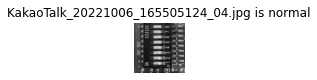

[[0.999997]]


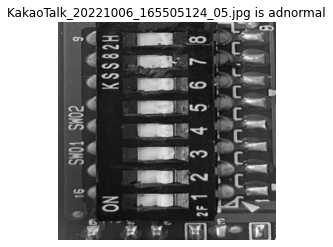

[[0.98450583]]


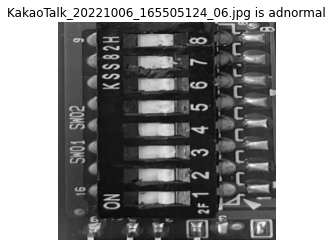

[[1.]]


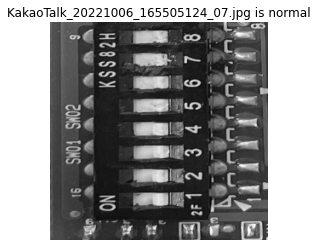

[[1.]]


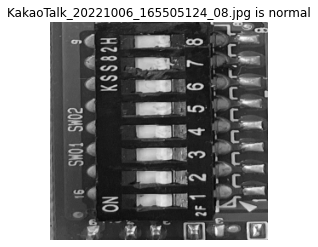

[[0.]]


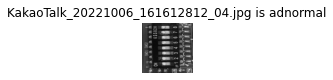

[[0.]]


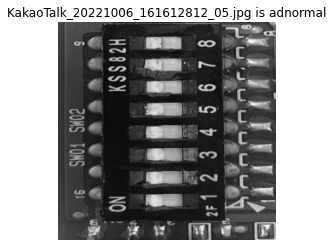

[[0.]]


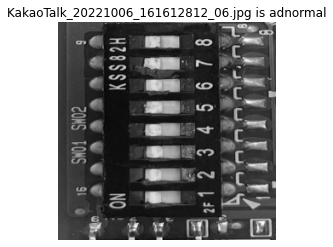

[[0.]]


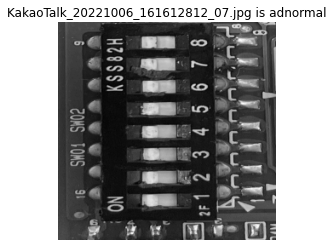

[[0.]]


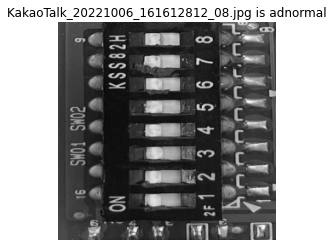

In [28]:

for screw,filenames in dic_screw_filenames.items():
    fig=plt.figure(figsize=(16,10))
    rows,cols=1,15
    for i,fn in enumerate(filenames):
        path=test_dir+screw+'/'+fn
        test_img=image.load_img(path,color_mode='grayscale',target_size=(256,256),interpolation='bilinear')
        x=image.img_to_array(test_img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        
        
        classes=model.predict(images,batch_size=10)
        print(classes)
        fig.add_subplot(rows,cols,i+1)
        if classes==1:
            plt.title(fn+" is normal")
            plt.axis('off')
            plt.imshow(test_img,cmap='gray')
            
        else:
            plt.title(fn+" is adnormal")
            plt.axis('off')
            plt.imshow(test_img,cmap='gray')
        plt.show();
